In [12]:
import pandas as pd
import smote_variants as sv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from Models.funciones import grafica_roc,classification_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.multiclass import OneVsRestClassifier

import time

Según el método wraper la mejor combinación de características es con 8 características, correspondientes
a (0, 1, 2, 3, 4, 6, 7, 8), de acá en adelante se van a hacer 4 modelos de XGBOOST
* 8 características y standar scaler
* 8 características y standar scaler
* 9 características y min max
* 9 características y min max

Todo esto se repite con el One hot encoder

In [19]:
def model_Ada(x,y,estimadores, impresion = False,normalize=False,one_hot=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    if(one_hot):
            model = AdaBoostClassifier(n_estimators=estimadores)
            Ada = OneVsRestClassifier(model)
    else:
        Ada = AdaBoostClassifier(n_estimators=5)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        Ada.fit(Xtrain, Ytrain)
        pred = Ada.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)

    if impresion == True:

        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=Ada,Xtest=Xtest,Ytest=Ytest)
        
    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result

# LABEL ENCODER

In [20]:
df1=pd.read_csv('./CSV ready to model/withoutPCA.csv')
df2=pd.read_csv('./CSV ready to model/withoutPCA_minmax.csv')

In [21]:
le=LabelEncoder()
df1['GRAVEDAD']=df1.loc[:,['GRAVEDAD']].apply(le.fit_transform)
df2['GRAVEDAD']=df2.loc[:,['GRAVEDAD']].apply(le.fit_transform)

In [22]:
y_minmax9=df2['GRAVEDAD']
x_minmax9=df2.drop(['GRAVEDAD','PERIODO'],axis=1)
y_minmax8=df2['GRAVEDAD']
x_minmax8=df2.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

y_standar9=df1['GRAVEDAD']
x_standar9=df1.drop(['GRAVEDAD','PERIODO'],axis=1)
y_standar8=df1['GRAVEDAD']
x_standar8=df1.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

## Min Max scaler

### Min max de 9 características

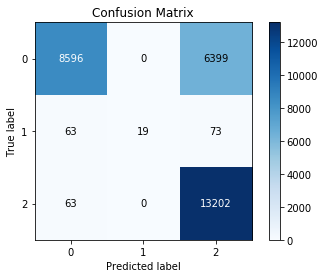

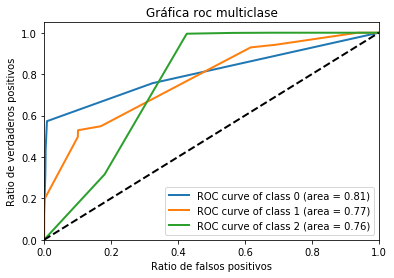

In [24]:
result1 = model_Ada(x=x_minmax9,y=y_minmax9,estimadores=5, impresion = True,normalize=False)

In [25]:
print(result1)

{'Eficiencia': 0.7662414217842689, 'Int_Eficiencia': 0.0012998384290542951, 'Sensibilidad': 0.564340257342824, 'Int_Sensibilidad': 0.35516321715742316, 'Precisión': 0.8722591182020943, 'Int Precisión': 0.1488923557344437, 'F': 0.5817773493912408, 'Int_F': 0.2571522956936257, 'Error': 0.23375857821573112, 'Int_Error': 0.0012998384290542752, 'Tiempo': 1.441429615020752}


### min max de 8 características

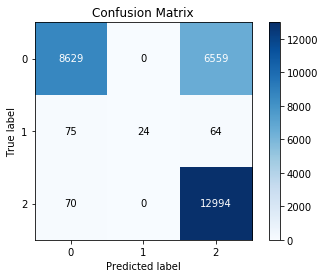

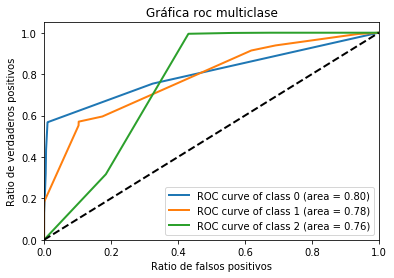

In [26]:
result2 = model_Ada(x=x_minmax8,y=y_minmax8,estimadores=5, impresion = True,normalize=False)

In [27]:
print(result2)

{'Eficiencia': 0.6808287876121766, 'Int_Eficiencia': 0.08201466377763064, 'Sensibilidad': 0.5899023852487688, 'Int_Sensibilidad': 0.32522480894789696, 'Precisión': 0.7055216013426189, 'Int Precisión': 0.33581918187758764, 'F': 0.5037321387138056, 'Int_F': 0.2894387072954447, 'Error': 0.3191712123878233, 'Int_Error': 0.0820146637776306, 'Tiempo': 1.4247281551361084}


# Standar scaler


### Standar scaler 9 caracterísicas


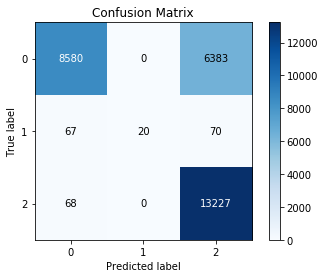

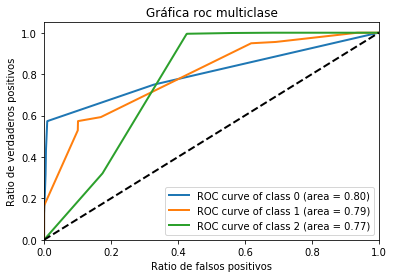

In [28]:
result3 = model_Ada(x=x_standar9,y=y_standar9,estimadores=5,impresion = True,normalize=False)

In [29]:
print(result3)

{'Eficiencia': 0.7674115783916946, 'Int_Eficiencia': 0.0012671808472559604, 'Sensibilidad': 0.572805454975881, 'Int_Sensibilidad': 0.34573564467730517, 'Precisión': 0.8728057991250086, 'Int Precisión': 0.14825886704618418, 'F': 0.5943658245059961, 'Int_F': 0.2419433592182924, 'Error': 0.23258842160830545, 'Int_Error': 0.0012671808472559452, 'Tiempo': 1.4859402179718018}


### Standar scaler 8 caracteristicas

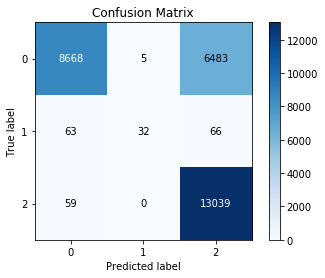

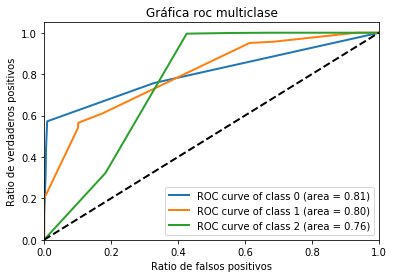

In [30]:
result4 = model_Ada(x=x_standar8,y=y_standar8,estimadores=5, impresion = True,normalize=False)

In [31]:
print(result4)

{'Eficiencia': 0.7661182474045398, 'Int_Eficiencia': 0.0017561773192123556, 'Sensibilidad': 0.5742818274504596, 'Int_Sensibilidad': 0.34275620343455937, 'Precisión': 0.8732441777365146, 'Int Precisión': 0.1486528182098792, 'F': 0.5968262125646667, 'Int_F': 0.23621461861242568, 'Error': 0.23388175259546012, 'Int_Error': 0.0017561773192123732, 'Tiempo': 1.4548654556274414}


# ONE HOT ENCODER

In [32]:
df3=pd.read_csv('./CSV ready to model/withoutPCA.csv')
df4=pd.read_csv('./CSV ready to model/withoutPCA_minmax.csv')

In [33]:
y_minmax9=pd.get_dummies(df4['GRAVEDAD'], prefix='GRAVEDAD')
x_minmax9=df4.drop(['GRAVEDAD','PERIODO'],axis=1)
y_minmax8=pd.get_dummies(df4['GRAVEDAD'], prefix='GRAVEDAD')
x_minmax8=df4.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

y_standar9=pd.get_dummies(df3['GRAVEDAD'], prefix='GRAVEDAD')
x_standar9=df3.drop(['GRAVEDAD','PERIODO'],axis=1)
y_standar8=pd.get_dummies(df3['GRAVEDAD'], prefix='GRAVEDAD')
x_standar8=df3.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

## Min Max scaler

### Min max de 9 características

In [34]:
result5 = model_Ada(x=x_minmax9,y=y_minmax9,estimadores=5, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [35]:
print(result5)

{'Eficiencia': 0.7622118599331339, 'Int_Eficiencia': 0.008314428904159484, 'Sensibilidad': 0.5949491776267964, 'Int_Sensibilidad': 0.3215602526696237, 'Precisión': 0.8622231131022637, 'Int Precisión': 0.13911923634873652, 'F': 0.6228337181400255, 'Int_F': 0.20279984499326278, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 3.081786870956421}


### Min max de 8 características

In [36]:
result6 = model_Ada(x=x_minmax8,y=y_minmax8,estimadores=5,impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [37]:
print(result6)

{'Eficiencia': 0.7674819637515398, 'Int_Eficiencia': 0.0014288834806026394, 'Sensibilidad': 0.5760351316480342, 'Int_Sensibilidad': 0.3418060163146644, 'Precisión': 0.858338457414861, 'Int Precisión': 0.13850079269811494, 'F': 0.5987004093355497, 'Int_F': 0.23632299608344834, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 2.7352561950683594}


## Standar scaler

### Standar scaler 9 características

In [38]:
result7 = model_Ada(x=x_standar9,y=y_standar9,estimadores=5, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [39]:
print(result7)

{'Eficiencia': 0.7595636107689601, 'Int_Eficiencia': 0.00741117231118621, 'Sensibilidad': 0.5819465430961852, 'Int_Sensibilidad': 0.3404167675716691, 'Precisión': 0.8512365470704721, 'Int Precisión': 0.12925635848015987, 'F': 0.6021996678674518, 'Int_F': 0.23357459577978607, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 2.8653903007507324}


### Standar scaler 8 características

In [40]:
result8 = model_Ada(x=x_standar8,y=y_standar8,estimadores=5, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [41]:
print(result8)

{'Eficiencia': 0.7659598803448884, 'Int_Eficiencia': 0.0010158362639991546, 'Sensibilidad': 0.579486174667557, 'Int_Sensibilidad': 0.3376662356740996, 'Precisión': 0.8589142423735363, 'Int Precisión': 0.13795954214961964, 'F': 0.6032599485259665, 'Int_F': 0.22896170280950698, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 3.4958271980285645}


## orden
1. Encoder minmax9
2. Encoder minmax8
3. Encoder standar9
4. Encoder standar8
5. OneHot minmax9
6. OneHot minmax8
7. OneHot standar9
8. OneHot standar8

In [42]:
def imprimir_resultados(results,medida):
    for i in range(len(results)):
        print(i+1,results[i][medida])

In [43]:
lista=[result1,result2,result3,result4,result5,result6,result7,result8]

In [44]:
imprimir_resultados(lista,'Eficiencia')

1 0.7662414217842689
2 0.6808287876121766
3 0.7674115783916946
4 0.7661182474045398
5 0.7622118599331339
6 0.7674819637515398
7 0.7595636107689601
8 0.7659598803448884


In [45]:
imprimir_resultados(lista,'Precisión')

1 0.8722591182020943
2 0.7055216013426189
3 0.8728057991250086
4 0.8732441777365146
5 0.8622231131022637
6 0.858338457414861
7 0.8512365470704721
8 0.8589142423735363


## Resultados preliminares

Con OneHot Encoder no se tuvieron buenos resultados, la mejor eficiencia se obtuvo con el modelo número 3, Encoder standar de 9 características, entonces ninguna de las cosas anteriores por intentar mejorar el modelo funciono, se procede a hacer oversampling.

In [46]:
y=df1['GRAVEDAD']
x=df1.drop(['GRAVEDAD','PERIODO'],axis=1)

# OVERSAMPLING !

Es necesario modificar el método para los modelos para que funcione con el oversampling

In [62]:
def model_Ada_Oversamp(x,y,estimadores, impresion = False,normalize=False,one_hot=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    if(one_hot):
            model = AdaBoostClassifier(n_estimators=caracteristicas)
            Ada = OneVsRestClassifier(model)
    else:
        Ada = AdaBoostClassifier(n_estimators=estimadores)
    for j in range(4):
        
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.25) # Modificar metodología de validación
        oversampler= sv.MulticlassOversampling(sv.distance_SMOTE(proportion=0.2))
        x_samp, y_samp= oversampler.sample(Xtrain, Ytrain)
        Ada.fit(x_samp, y_samp)
        
        pred = Ada.predict(Xtest.values)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)

    if impresion == True:

        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=Ada,Xtest=Xtest.values,Ytest=Ytest)
        
    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result

## Se vuelve a buscar la permutacion mas adecuada de parámetros

Aca se vuelve a buscar la mejor combinación de parámetros

In [83]:
import qgrid 


In [84]:
pd.options.mode.chained_assignment = None
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de estimadores' : pd.Series([5,8,15,25,50,75,100,200,250])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""

df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de estimadores'], inplace=True)

for n in df_types.index:
    result =  model_Ada_Oversamp(x,y,n,impresion = False)
    df_types["Eficiencia"][n] = result['Eficiencia']
    df_types["Int_Eficiencia"][n] = result['Int_Eficiencia']
    df_types["Sensibilidad"][n] = result['Sensibilidad']
    df_types["Int_Sensibilidad"][n] = result['Int_Sensibilidad']
    df_types["Precision"][n] = result['Precisión']
    df_types["Int_Precision"][n] = result['Precisión']
    df_types["F-Score"][n] = result['F']
    df_types["Int_F-Score"][n] = result['Int_F']
    df_types["Error_Prueba"][n] = result['Error']
    df_types["Int_error"][n] = result['Int_Error']
    df_types["Tiempo de ejecución"][n] = result['Tiempo']

2020-05-29 18:21:30,642:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 18:21:30,650:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 18:21:30,654:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:21:37,020:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 18:21:37,023:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.49722962351865685, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:21:39,100:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 18:21:39,105:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 18:21:39,109:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs

2020-05-29 18:23:31,255:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.49728306163949726, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:23:35,662:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 18:23:35,667:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 18:23:35,672:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:23:42,923:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 18:23:42,926:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.49729356469828256, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:23:47,377:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 18:23:47,383:INFO:MulticlassOversa

2020-05-29 18:26:40,207:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 18:26:40,210:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4973319222414081, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:26:52,890:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 18:26:52,895:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 18:26:52,899:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:26:59,664:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 18:26:59,668:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4973380066106169, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 18:27:12,352:INFO:MulticlassOversampling: Running multiclass oversampling 

In [85]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [92]:
print(df_types)

                      Eficiencia Int_Eficiencia Sensibilidad Int_Sensibilidad  \
Numero de estimadores                                                           
5                        0.63067      0.0105435     0.586766         0.295455   
8                        0.64041      0.0379055      0.61614         0.214227   
15                      0.654549     0.00547707     0.572843         0.255955   
25                       0.69817      0.0145622     0.597321         0.263872   
50                      0.733275     0.00262781     0.591299         0.294765   
75                      0.738281     0.00587672      0.60069         0.288735   
100                     0.748707     0.00647978     0.591858         0.306238   
200                     0.757179     0.00131617     0.591998         0.311035   
250                     0.759335     0.00278762     0.594746         0.307855   

                      Precision Int_Precision   F-Score Int_F-Score  \
Numero de estimadores                

2020-05-29 19:05:46,854:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 19:05:46,860:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 19:05:46,865:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 19:05:54,665:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 19:05:54,668:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4972472556311211, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 19:06:25,031:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 19:06:25,036:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 19:06:25,041:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs'

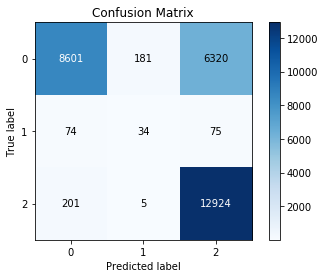

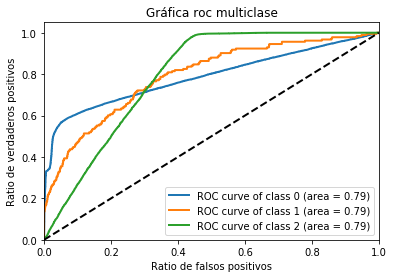

In [87]:
result9=model_Ada_Oversamp(x=x,y=y,estimadores=250, impresion = True,normalize=False)

In [88]:
print(result9)

{'Eficiencia': 0.7600651064578569, 'Int_Eficiencia': 0.0021801538562438738, 'Sensibilidad': 0.5808884758595778, 'Int_Sensibilidad': 0.3259336431662306, 'Precisión': 0.605070750294177, 'Int Precisión': 0.3290405276076596, 'F': 0.5649859670273418, 'Int_F': 0.2752395579435777, 'Error': 0.23993489354214323, 'Int_Error': 0.002180153856243863, 'Tiempo': 156.4016034603119}


In [89]:
lista=[result1,result2,result3,result4,result5,result6,result7,result8,result9]

In [90]:
imprimir_resultados(lista,'Eficiencia')

1 0.7662414217842689
2 0.6808287876121766
3 0.7674115783916946
4 0.7661182474045398
5 0.7622118599331339
6 0.7674819637515398
7 0.7595636107689601
8 0.7659598803448884
9 0.7600651064578569


In [91]:
imprimir_resultados(lista,'Precisión')

1 0.8722591182020943
2 0.7055216013426189
3 0.8728057991250086
4 0.8732441777365146
5 0.8622231131022637
6 0.858338457414861
7 0.8512365470704721
8 0.8589142423735363
9 0.605070750294177
